In [1]:
#######the latest house price data available from: https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

<font size = 6> Data cleaning Step 
</font>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#####loading the data
df_raw = pd.read_csv('nyc_new.csv')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44825 entries, 0 to 44824
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         44825 non-null  int64 
 1   NEIGHBORHOOD                    44825 non-null  object
 2   BUILDING CLASS CATEGORY         44825 non-null  object
 3   BLOCK                           44825 non-null  int64 
 4   LOT                             44825 non-null  int64 
 5   BUILDING CLASS AT PRESENT       44825 non-null  object
 6   ADDRESS                         44825 non-null  object
 7   ZIP CODE                        44825 non-null  int64 
 8   RESIDENTIAL UNITS               44825 non-null  object
 9   COMMERCIAL UNITS                44825 non-null  int64 
 10  TOTAL UNITS                     44825 non-null  object
 11  LAND SQUARE FEET                44825 non-null  int64 
 12  GROSS SQUARE FEET               44825 non-null

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000,4.482500e+04,4.482500e+04,44825.000000,4.482500e+04
mean,3.546258,5539.377312,67.452069,11019.448054,0.246871,4.902865e+03,5.807042e+03,1942.384607,9.391102e+05
std,0.981199,3685.477380,143.060185,462.177110,4.520444,8.017881e+04,4.182283e+04,31.014941,6.745778e+06
min,1.000000,2.000000,1.000000,10001.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,0.000000e+00
25%,3.000000,2718.000000,19.000000,10466.000000,0.000000,2.000000e+03,1.404000e+03,1920.000000,0.000000e+00
50%,4.000000,5123.000000,39.000000,11221.000000,0.000000,2.500000e+03,1.968000e+03,1931.000000,4.750000e+05
75%,4.000000,7718.000000,65.000000,11373.000000,0.000000,4.000000e+03,2.760000e+03,1960.000000,8.441290e+05
max,5.000000,16322.000000,4508.000000,11694.000000,436.000000,7.649136e+06,2.400000e+06,2021.000000,8.099126e+08


In [4]:
df_raw['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS',
       '32 HOSPITAL AND HEALTH FACILITIES',
       '08 RENTALS - ELEVATOR APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '21 OFFICE BUILDINGS', '22 STORE BUILDINGS', '25 LUXURY HOTELS',
       '29 COMMERCIAL GARAGES', '30 WAREHOUSES', '26 OTHER HOTELS',
       '34 THEATRES', '11 SPECIAL CONDO BILLING LOTS', '27 FACTORIES',
       '41 TAX CLASS 4 - OTHER',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '37 RELIGIOUS FACILITIES', '38 ASYLUMS AND HOMES',
       '33 EDUCATIONAL FACILITIES', '31 COMMERCIAL VACANT LAND',
       '06 TAX CLASS 1 - OTHER', '05 TAX CLASS 1 VACANT LAND',
       '36 OUTDOOR RECREATIONAL FACILITIES'], dtype=object)

In [5]:
#######Data pre-processing part. 

In [6]:
#switch the data type
df_raw['LAND SQUARE FEET']=pd.to_numeric(df_raw['LAND SQUARE FEET'],errors='coerce')
df_raw['GROSS SQUARE FEET']=pd.to_numeric(df_raw['GROSS SQUARE FEET'],errors='coerce')
df_raw['SALE PRICE']=pd.to_numeric(df_raw['SALE PRICE'],errors='coerce')
df_raw=df_raw[df_raw['SALE PRICE'].notnull()]

In [7]:
df_raw['BOROUGH']=df_raw['BOROUGH'].astype('object')
df_raw['BLOCK']=df_raw['BLOCK'].astype('object')
df_raw['LOT']=df_raw['LOT'].astype('object')
df_raw['ZIP CODE'] = df_raw['ZIP CODE'].astype('object')

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44825 entries, 0 to 44824
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         44825 non-null  object
 1   NEIGHBORHOOD                    44825 non-null  object
 2   BUILDING CLASS CATEGORY         44825 non-null  object
 3   BLOCK                           44825 non-null  object
 4   LOT                             44825 non-null  object
 5   BUILDING CLASS AT PRESENT       44825 non-null  object
 6   ADDRESS                         44825 non-null  object
 7   ZIP CODE                        44825 non-null  object
 8   RESIDENTIAL UNITS               44825 non-null  object
 9   COMMERCIAL UNITS                44825 non-null  int64 
 10  TOTAL UNITS                     44825 non-null  object
 11  LAND SQUARE FEET                44825 non-null  int64 
 12  GROSS SQUARE FEET               44825 non-null

In [9]:
df_raw.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,374,46,A4,347 EAST 4TH STREET,10009,1,0,1,2116,4400,1900,A4,2385000,2021/2/9
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,377,72,B9,231 EAST 7TH,10009,2,0,2,1718,5154,1901,B9,0,2020/10/2
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,377,66,C0,243 EAST 7TH STREET,10009,3,0,3,2381,3084,1899,C0,0,2020/10/31
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,372,10,C7,274 EAST 3RD,10009,9,1,10,2021,6445,1900,C7,0,2020/12/27
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,374,1,C7,301-303 EAST 4TH STREET,10009,8,2,10,1501,6929,1900,C7,3672530,2020/11/24


In [10]:
df_raw.describe()

,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,44825.000000,4.482500e+04,4.482500e+04,44825.000000,4.482500e+04
mean,0.246871,4.902865e+03,5.807042e+03,1942.384607,9.391102e+05
std,4.520444,8.017881e+04,4.182283e+04,31.014941,6.745778e+06
min,0.000000,0.000000e+00,0.000000e+00,1800.000000,0.000000e+00
25%,0.000000,2.000000e+03,1.404000e+03,1920.000000,0.000000e+00
50%,0.000000,2.500000e+03,1.968000e+03,1931.000000,4.750000e+05
75%,0.000000,4.000000e+03,2.760000e+03,1960.000000,8.441290e+05
max,436.000000,7.649136e+06,2.400000e+06,2021.000000,8.099126e+08


In [11]:
df_raw=df_raw[~df_raw['SALE PRICE'].isin([0])]
df_house_price=df_raw
df_raw['YEAR BUILT'].value_counts()
for value in df_house_price.index.values:
    if df_house_price.loc[value,'YEAR BUILT'] == 0:
        df_house_price.loc[value,'YEAR BUILT']=1930

In [12]:
df_raw.info()
df_raw.describe()
df_raw.to_csv('price.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26681 entries, 0 to 44824
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         26681 non-null  object
 1   NEIGHBORHOOD                    26681 non-null  object
 2   BUILDING CLASS CATEGORY         26681 non-null  object
 3   BLOCK                           26681 non-null  object
 4   LOT                             26681 non-null  object
 5   BUILDING CLASS AT PRESENT       26681 non-null  object
 6   ADDRESS                         26681 non-null  object
 7   ZIP CODE                        26681 non-null  object
 8   RESIDENTIAL UNITS               26681 non-null  object
 9   COMMERCIAL UNITS                26681 non-null  int64 
 10  TOTAL UNITS                     26681 non-null  object
 11  LAND SQUARE FEET                26681 non-null  int64 
 12  GROSS SQUARE FEET               26681 non-null

In [13]:
######locading the geo_file here:
import geopandas as gpd

In [14]:
gdf_raw = gpd.read_file('ZIP_CODE_040114.shp')

In [15]:
gdf_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 26.8+ KB


In [16]:
gdf_raw['ZIPCODE'].unique()
#####change the data type from object to int 64
####delete the abnormal row with zipcode. 
gdf_raw = gdf_raw.drop(index=(gdf_raw.loc[(gdf_raw['ZIPCODE']==83)].index))
gdf_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 28.8+ KB


In [17]:
len_1 = df_raw['ZIP CODE']
len_2 = gdf_raw['ZIPCODE']

In [18]:
df_raw['ZIP CODE'].unique()

array([10009, 10011, 10014, 10001, 10013, 10038, 10002, 10007, 10019,
       10036, 10003, 10018, 10005, 10004, 10006, 10010, 10012, 10037,
       10027, 10030, 10031, 10026, 10035, 10039, 10029, 10463, 10034,
       10025, 10022, 10017, 10020, 10016, 10065, 10021, 10075, 10028,
       10128, 10023, 10024, 10032, 10033, 10040, 10457, 10458, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10465, 10459, 10471, 10453, 10452, 10474, 10456, 10451, 10455,
       10461, 10454, 10470, 11228, 11214, 11220, 11209, 11221, 11233,
       11213, 11216, 11238, 11206, 11205, 11204, 11219, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11224, 11225, 11208, 11226, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11249, 11370, 11691, 11692, 11102,
       11106, 11103, 11377, 11105, 11101, 11361, 11357, 11360, 11358,
       11364, 11693, 11694, 11426, 11004, 11001, 11435, 11411, 11356,
       11354, 11420,

In [19]:
gdf_raw['ZIPCODE'].unique()

array(['11436', '11213', '11212', '11225', '11218', '11226', '11219',
       '11210', '11230', '11204', '10471', '10470', '10466', '10467',
       '10463', '10475', '10464', '10469', '10468', '10458', '10034',
       '10033', '10462', '10040', '10453', '10465', '10461', '10457',
       '10460', '10032', '10452', '10456', '10472', '10031', '10039',
       '10459', '10451', '10473', '10030', '10027', '10474', '10455',
       '10037', '10024', '10454', '10026', '10035', '10048', '10025',
       '11357', '10029', '00083', '11356', '11359', '11360', '11105',
       '10128', '10023', '11363', '10028', '11354', '11102', '11370',
       '10021', '11358', '11362', '10044', '11369', '11103', '11106',
       '11368', '11377', '11355', '11101', '11364', '10018', '10020',
       '11005', '10017', '10001', '10011', '10016', '11104', '11109',
       '10010', '11367', '10014', '10003', '11222', '10002', '11378',
       '10009', '10012', '10013', '10007', '11237', '11385', '10038',
       '11206', '100

In [20]:
#####loading another shapefile---we need latitude and longitude from here. 

In [21]:
gdf_ano = gpd.read_file('FacDB_20210315.shp')

In [22]:
gdf_ano.info()
gdf_ano.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30930 entries, 0 to 30929
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FACNAME     30924 non-null  object  
 1   ADDRESSNUM  25516 non-null  object  
 2   STREETNAME  25559 non-null  object  
 3   ADDRESS     25145 non-null  object  
 4   CITY        30534 non-null  object  
 5   ZIPCODE     30538 non-null  object  
 6   BORO        30927 non-null  object  
 7   BOROCODE    30930 non-null  int64   
 8   BIN         30930 non-null  int64   
 9   BBL         30930 non-null  float64 
 10  COMMBOARD   30930 non-null  int64   
 11  NTA         30581 non-null  object  
 12  COUNCIL     30930 non-null  int64   
 13  SCHOOLDIST  30528 non-null  object  
 14  POLICEPRCT  30930 non-null  int64   
 15  CENSTRACT   30930 non-null  object  
 16  FACTYPE     30897 non-null  object  
 17  FACSUBGRP   30930 non-null  object  
 18  FACGROUP    30930 non-null  object  
 

,FACNAME,ADDRESSNUM,STREETNAME,ADDRESS,CITY,ZIPCODE,BORO,BOROCODE,BIN,BBL,...,CAPACITY,CAPTYPE,PROPTYPE,LATITUDE,LONGITUDE,XCOORD,YCOORD,DATASOURCE,UID,geometry
0,ENGINE 96/LADDER 54,1689,STORY AVENUE,1689 STORY AVENUE,BRONX,10473,Bronx,2,2022629,2.036600e+09,...,0,None,None,40.823020,-73.869342,1.020412e+06,239152.369216,fdny_firehouses,151b0155ff655590430216bbcb20df4b,POINT (1020412.567 239149.352)
1,"SAM CONSULTING SERVICES, INC.",1723,EAST 12 STREET,1723 EAST 12 STREET,BROOKLYN,11229,Brooklyn,3,3329266,3.067950e+09,...,0,None,None,40.607351,-73.960579,9.951960e+05,160553.378254,nysed_activeinstitutions,79b0edacfda9269eaea9f8aa4e629cd9,POINT (995196.385 160550.377)
2,"""UNCLE"" VITO F. MARANZANO GLENDALE PLAYGROUND",2869,CENTRAL AVENUE,2869 CENTRAL AVENUE,RIDGEWOOD,11385,Queens,4,4089051,4.036610e+09,...,0,None,None,40.704931,-73.881757,1.017034e+06,196123.976233,dpr_parksproperties,1ac6da16a9d1325bb4ac9fce32ac0160,POINT (1017034.476 196120.967)
3,THE STUDIO SCHOOL,117,WEST 95 STREET,117 WEST 95 STREET,NEW YORK,10025,Manhattan,1,1032605,1.012260e+09,...,0,None,None,40.792725,-73.968687,9.929205e+05,228089.599338,dohmh_daycare,e3cf686d5648b4f9e532ac1b8b37a95f,POINT (992920.856 228086.585)
4,(CLOSED) ARLINGTON LIBRARY,203,ARLINGTON AVENUE,203 ARLINGTON AVENUE,BROOKLYN,11207,Brooklyn,3,3087001,3.039230e+09,...,0,None,None,40.680686,-73.887233,1.015527e+06,187288.664186,bpl_libraries,1ede4f0bbd4ee876b5a610bcefdf7bad,POINT (1015527.637 187285.657)


In [23]:
########attention please!!!!!!!!from gdf_ano, ]
coord = gdf_ano[['ZIPCODE','LATITUDE','LONGITUDE','ADDRESS']]

In [24]:
coord.info()
coord.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30930 entries, 0 to 30929
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZIPCODE    30538 non-null  object 
 1   LATITUDE   30930 non-null  float64
 2   LONGITUDE  30930 non-null  float64
 3   ADDRESS    25145 non-null  object 
dtypes: float64(2), object(2)
memory usage: 966.7+ KB


,ZIPCODE,LATITUDE,LONGITUDE,ADDRESS
0,10473,40.823020,-73.869342,1689 STORY AVENUE
1,11229,40.607351,-73.960579,1723 EAST 12 STREET
2,11385,40.704931,-73.881757,2869 CENTRAL AVENUE
3,10025,40.792725,-73.968687,117 WEST 95 STREET
4,11207,40.680686,-73.887233,203 ARLINGTON AVENUE


In [25]:
#######try to merge this with df_raw

In [26]:
coord.to_csv('coord.csv',index=False,header=False)

In [27]:
coord['ZIPCODE'].unique()

array(['10473', '11229', '11385', '10025', '11207', '11238', '11219',
       '11201', '11216', '11212', '11231', '11208', '11228', '11213',
       '11234', '11223', '11236', '11218', '11211', '11230', '11217',
       '11203', '11204', '11233', '11235', '11232', '11214', '10004',
       '10314', '10029', '10017', '10006', '10075', '10005', '10002',
       '10010', '10023', '10007', '10038', '11369', '10128', '10011',
       '10468', '10178', '10069', '10018', '10460', '10039', '10451',
       '10028', '11432', '10013', '11365', '11101', '10456', '10009',
       '10003', '10022', '10036', '10452', '11372', '10026', '10035',
       '10001', '10462', '10301', '10306', '10065', '10014', '10027',
       '10020', '10019', '11205', '10016', '10105', None, '10031',
       '11435', '11249', '11226', '11357', '10032', '10461', '11215',
       '10021', '10453', '11225', '10033', '10458', '11222', '10040',
       '11368', '11209', '10034', '10024', '11237', '11375', '11413',
       '10470', '10466'

In [28]:
#####loading the coord again 

In [29]:
df_new = pd.read_csv('mean_hp.csv')

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIPCODE            175 non-null    int64  
 1   TOTAL UNITS        175 non-null    float64
 2   LAND SQUARE FEET   175 non-null    float64
 3   GROSS SQUARE FEET  175 non-null    float64
 4   YEAR BUILT         175 non-null    float64
 5   RESIDENTIAL UNITS  175 non-null    float64
 6   COMMERCIAL UNITS   175 non-null    float64
 7   LATITUDE           175 non-null    float64
 8   LONGITUDE          175 non-null    float64
 9   SALE PRICE         175 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 13.8 KB


In [31]:
#####add a boxplot and distribution plot, 

In [32]:
#####OLS as the basis regression model, GWR with map, and sklearn with LinearSVC. 
#####SVC example available from: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC
######AIC,R^2 as the benchmark. 

In [33]:
########set up the OLS model
df_new = df_new[~df_new['SALE PRICE'].isin(['0'])]
df_new = df_new[~df_new['TOTAL UNITS'].isin(['0'])]

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIPCODE            175 non-null    int64  
 1   TOTAL UNITS        175 non-null    float64
 2   LAND SQUARE FEET   175 non-null    float64
 3   GROSS SQUARE FEET  175 non-null    float64
 4   YEAR BUILT         175 non-null    float64
 5   RESIDENTIAL UNITS  175 non-null    float64
 6   COMMERCIAL UNITS   175 non-null    float64
 7   LATITUDE           175 non-null    float64
 8   LONGITUDE          175 non-null    float64
 9   SALE PRICE         175 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 15.0 KB


In [35]:
df_new.describe()

,ZIPCODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,LATITUDE,LONGITUDE,SALE PRICE
count,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,10818.662857,7.358457,1.533537e+04,19487.246629,1936.829257,6.095714,1.263257,40.722683,-73.914457,5.779200e+06
std,573.131422,19.494177,1.318778e+05,69835.283235,18.116434,18.567385,5.636247,0.098809,0.101662,1.436443e+07
min,10001.000000,1.000000,1.602000e+03,1303.540000,1902.510000,0.000000,0.000000,40.010000,-74.240000,4.771840e+05
25%,10303.500000,1.525000,2.860465e+03,2051.120000,1924.225000,1.360000,0.060000,40.675000,-73.980000,7.956630e+05
50%,11201.000000,2.550000,3.530230e+03,3228.330000,1935.960000,2.170000,0.160000,40.730000,-73.920000,1.377860e+06
75%,11360.500000,5.620000,4.687335e+03,8567.985000,1945.440000,4.255000,0.580000,40.780000,-73.840000,3.466397e+06
max,11694.000000,229.730000,1.743118e+06,615108.670000,2016.200000,229.370000,66.610000,40.900000,-73.710000,1.128500e+08


<font size = 6>Machine Learning step
    </font>

<font size = 5> OLS MODEL
</font>

Text(0.5, 1.0, 'Correlation Matrix for basic regression model')

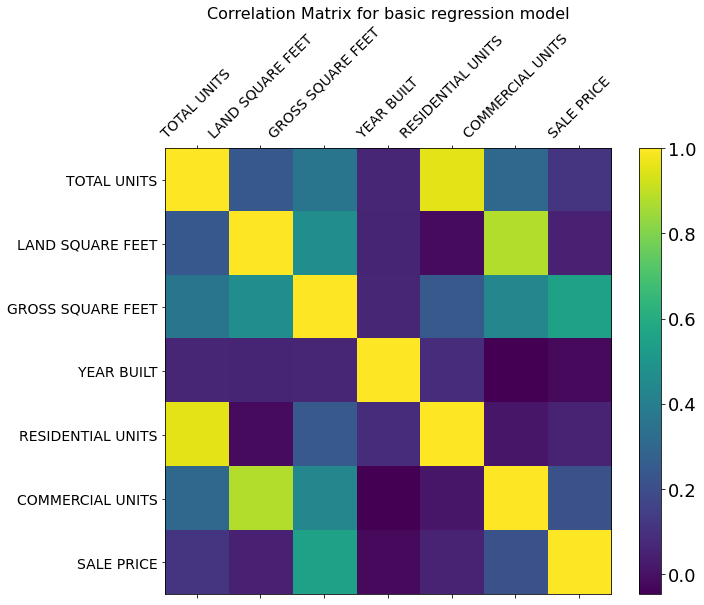

In [78]:
######correlation matrix to test the multi-collinearity
data = df_new.drop(['ZIPCODE','LATITUDE','LONGITUDE'],axis=1)
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix for basic regression model', fontsize=16)

In [37]:
######use the vif here to eliminate the multi-collinearity

In [38]:
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [39]:
def drop_column_using_vif_(data, list_var_not_to_remove, thresh=4):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        data_with_const = add_constant(data)

        vif_data = pd.Series([variance_inflation_factor(data_with_const.values, i) 
               for i in range(data_with_const.shape[1])], name= "VIF",
              index=data_with_const.columns).to_frame()

        # drop the const
        vif_data = vif_data.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_data.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_data.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_data.index[vif_data.VIF == vif_data.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            data = data.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return data

In [40]:
# using VIF on the house price data set 
predictors_house_price = data.drop('SALE PRICE', axis=1)
response_house = data['SALE PRICE']

In [80]:
# this is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
list_var_not_to_remove = []
data_predictors_select_VIF = drop_column_using_vif_(predictors_house_price, list_var_not_to_remove, thresh=4)
print("The columns remaining after VIF selection are:") 
print(data_predictors_select_VIF.columns)

Max VIF: 14988001.718150752
Dropping: TOTAL UNITS
Max VIF: 4.9065405217439375
Dropping: LAND SQUARE FEET
Max VIF: 1.3402932728854011
The columns remaining after VIF selection are:
Index(['GROSS SQUARE FEET', 'YEAR BUILT', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS'],
      dtype='object')


In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=data_predictors_select_VIF, y=response_house)

LinearRegression()

In [82]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": data_predictors_select_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  85642275.24578258
                 var           coef
0  GROSS SQUARE FEET     123.013364
1         YEAR BUILT  -42176.398981
2  RESIDENTIAL UNITS  -66826.901776
3   COMMERCIAL UNITS -130160.398314


In [83]:
print('R2:')
lr.score(X=data_predictors_select_VIF, y=response_house)

R2:


0.31477398066094775

In [45]:
import statsmodels.api as sm
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_house, exog=sm.add_constant(data_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     19.52
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           3.08e-13
Time:                        19:33:51   Log-Likelihood:                -3098.8
No. Observations:                 175   AIC:                             6208.
Df Residuals:                     170   BIC:                             6223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.564e+07   9.82e+07      0.872      0.385   -1.08e+08     2.8e+08
GROSS SQUARE FEET   123.0134     15.118      8.137      0.000      93.169     152.857
YEAR BUILT        -4.218e+04   5.07e+04     -0.831      0.407   -1.42e+05     5.8e+04
RESIDENTIAL UNITS -6.683e+04   5.11e+04     -1.309      0.192   -1.68e+05    3.39e+04
COMMERCIAL UNITS  -1.302e+05   1.82e+05     -0.717      0.475   -4.89e+05    2.28e+05
==============================================================================
Omnibus:                      162.598   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4187.788
Skew:                           3.266   Prob(JB):                         0.00
Kurtosis:                      26.057   Cond. No.                     7.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
mean_ols = regressor_OLS.predict()    ######记得求均值方差！！！！
mean_ols.mean()#######m

5779199.7488870155

<font size = 5> GWR model:
    </font>

In [47]:
#####recall: gdf_raw(with map);df_new(price)
gdf_raw.info()
gdf_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 28.8+ KB


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [48]:
#########import pkg before runnning the model. 
import numpy as np
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [49]:
####before visualisation the data, we should insert the sale price data from df_new to gdf_raw. 
insert_price = pd.read_csv('mean_hp.csv',usecols = (0,9))
insert_price.info()
insert_price.to_csv('insert_price.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZIPCODE     175 non-null    int64  
 1   SALE PRICE  175 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [50]:
test_geo = gpd.read_file('ZIP_CODE_040114.shp',usecols = ['ZIPCODE'])
test_geo['ZIPCODE']=pd.to_numeric(test_geo['ZIPCODE'],errors='coerce')
test = test_geo.iloc[:,0]
test.to_csv('ZIPCODE.csv')

In [51]:
#######merge the data here
df_test = pd.read_csv('TEST.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     263 non-null    int64  
 1   PRICE   263 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [52]:
#####still use the object again to merge here
####for geodata
df_test['ZIP'] = df_test['ZIP'].astype('object')
#####now let's merge them the last time
####merge_data = pd.merge(gdf_raw, df_test, left_on='ZIPCODE', right_on='ZIP', how='inner')
#####success!!!!!

merge_data = pd.concat([gdf_raw,df_test],axis=1,join='inner')
merge_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
 13  ZIP         263 non-null    object  
 14  PRICE       263 non-null    float64 
dtypes: float64(5), geometry(1), object(9)
memory usage: 32.9+ KB


In [76]:
#ax1 = merge_data.plot(edgecolor='black',column="PRICE",cmap='GnBu',figsize=(12,12))
######merge_data.centroid.plot(color='r',marker='o')
#ax1.set_axis_off()

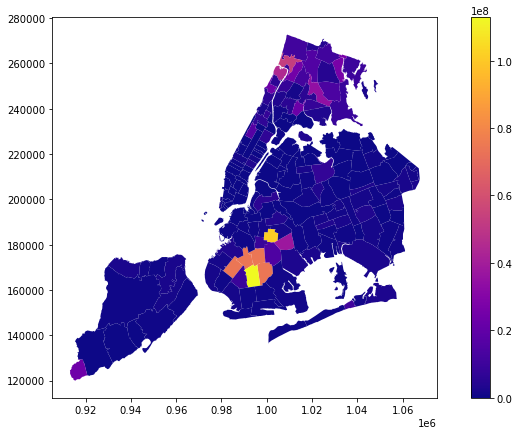

In [54]:
#####should mapping the house price
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merge_data.plot(column='PRICE', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

plt.savefig('Mapping_use.png', dpi=150)

In [55]:
###########merge our data?
#dependent variables
geo_y = df_new['SALE PRICE'].values.reshape((-1,1))

In [56]:
#independent variables
geo_X = df_new[['RESIDENTIAL UNITS','COMMERCIAL UNITS','GROSS SQUARE FEET','YEAR BUILT']].values

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIPCODE            175 non-null    int64  
 1   TOTAL UNITS        175 non-null    float64
 2   LAND SQUARE FEET   175 non-null    float64
 3   GROSS SQUARE FEET  175 non-null    float64
 4   YEAR BUILT         175 non-null    float64
 5   RESIDENTIAL UNITS  175 non-null    float64
 6   COMMERCIAL UNITS   175 non-null    float64
 7   LATITUDE           175 non-null    float64
 8   LONGITUDE          175 non-null    float64
 9   SALE PRICE         175 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 15.0 KB


In [58]:
gdf_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 28.8+ KB


In [59]:
####add up the coordinates. 
u = df_new['LONGITUDE']
v = df_new['LATITUDE']
g_coords = list(zip(u,v))

In [60]:
#Standardlization our dataset
geo_X = (geo_X - geo_X.mean(axis=0)) / geo_X.std(axis=0)
geo_y = geo_y.reshape((-1,1))
geo_y = (geo_y - geo_y.mean(axis=0)) / geo_y.std(axis=0)

In [61]:
gwr_selector = Sel_BW(g_coords, geo_y, geo_X)

In [62]:
gwr_bw = gwr_selector.search(search_method='golden_section',criterion='AICc')

In [63]:
gwr_results = GWR(g_coords, geo_y, geo_X, gwr_bw, fixed=False, kernel='bisquare', constant=True, spherical=True).fit()

In [64]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 175
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            119.915
Log-likelihood:                                                    -215.239
AIC:                                                                440.477
AICc:                                                               442.977
BIC:                                                               -758.099
R2:                                                                   0.315
Adj. R2:                                                              0.299

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

<font size = 5>Linear SVR 
</font>

In [66]:
#######first find out the input and our target. 
#######recall that:
from sklearn.svm import LinearSVC, LinearSVR,SVC,SVR
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn import metrics
x = pd.read_csv('mean_hp.csv',usecols = [3,4,5,6])
y = pd.read_csv('mean_hp.csv',usecols = [9])

In [67]:
x = pd.read_csv('mean_hp.csv',usecols = [3,4,5,6])
y = pd.read_csv('mean_hp.csv',usecols = [9])

In [68]:
# split the input and target
#df_svr = pd.read_csv('price_fixed.csv',usecols = [1,2,3,4,5,6,9])
#idx = list(df_svr.index)
#x_train = x.loc[idx[:train_len]]
#y_train = y.loc[idx[:train_len]]
#x_test = x.loc[idx[train_len:train_len+test_len]]
#y_test = y.loc[idx[train_len:train_len+test_len]]

In [69]:
#################model construction--linear SVC
svr = svm.LinearSVR(random_state = 0)
svr.fit(x,y)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=0)

In [70]:
y_pred3 = svr.predict(x)

In [71]:
#######find the linear SVR score--R^2
svr.score(x, y)

0.24850509885969785

### appendix 

In [72]:
###data description

In [73]:
df_new.describe()

,ZIPCODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,LATITUDE,LONGITUDE,SALE PRICE
count,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,10818.662857,7.358457,1.533537e+04,19487.246629,1936.829257,6.095714,1.263257,40.722683,-73.914457,5.779200e+06
std,573.131422,19.494177,1.318778e+05,69835.283235,18.116434,18.567385,5.636247,0.098809,0.101662,1.436443e+07
min,10001.000000,1.000000,1.602000e+03,1303.540000,1902.510000,0.000000,0.000000,40.010000,-74.240000,4.771840e+05
25%,10303.500000,1.525000,2.860465e+03,2051.120000,1924.225000,1.360000,0.060000,40.675000,-73.980000,7.956630e+05
50%,11201.000000,2.550000,3.530230e+03,3228.330000,1935.960000,2.170000,0.160000,40.730000,-73.920000,1.377860e+06
75%,11360.500000,5.620000,4.687335e+03,8567.985000,1945.440000,4.255000,0.580000,40.780000,-73.840000,3.466397e+06
max,11694.000000,229.730000,1.743118e+06,615108.670000,2016.200000,229.370000,66.610000,40.900000,-73.710000,1.128500e+08


In [74]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIPCODE            175 non-null    int64  
 1   TOTAL UNITS        175 non-null    float64
 2   LAND SQUARE FEET   175 non-null    float64
 3   GROSS SQUARE FEET  175 non-null    float64
 4   YEAR BUILT         175 non-null    float64
 5   RESIDENTIAL UNITS  175 non-null    float64
 6   COMMERCIAL UNITS   175 non-null    float64
 7   LATITUDE           175 non-null    float64
 8   LONGITUDE          175 non-null    float64
 9   SALE PRICE         175 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 15.0 KB


/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


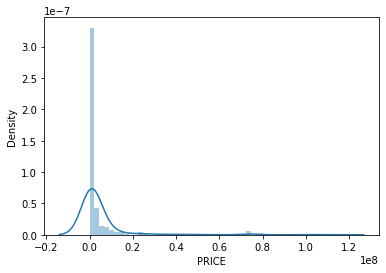

In [75]:
##############data distribution plot
#######scatter plot here to observce the distribution
#######
##df_new is our data to explore. 
cols = ['PRICE']
use = merge_data[cols].dropna()
pl_1 = sns.distplot(merge_data['PRICE'])